In [2]:
import numpy as np
import pandas as pd
import math
import sys, os
from tqdm import tqdm

In [3]:
from sklearn.preprocessing import MinMaxScaler

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import hex2color
import matplotlib.colors as mc
import mplcyberpunk
plt.style.use("cyberpunk")

In [5]:
pd.set_option('display.max_columns', 500)
sys.path.append(os.path.realpath('..'))

In [6]:
train_df = pd.read_csv(r"..\data\train.csv", index_col=0)
test_df = pd.read_csv(r"..\data\test.csv", index_col=0)
sample_sub = pd.read_csv(r"..\data\sample_submission.csv", index_col=0)

# Missing Data

In [7]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent = (train_df.isnull().sum()/train_df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print("Missing Data")
missing_data[missing_data['Total'] > 0]

Missing Data


,Total,Percent


# Explore Data

In [8]:
train_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000,219129.000000
mean,62377.415376,0.096008,0.048345,0.592102,0.069273,-0.161555,0.133688,-0.128224,0.149534,-0.048337,-0.039758,0.153632,-0.061038,0.014330,0.067649,0.108643,0.013650,0.036815,-0.033927,-0.008302,0.009708,-0.031064,-0.050852,-0.050531,-0.002992,0.124005,0.009881,0.014034,0.017313,66.359803,0.002140
std,25620.348569,1.395425,1.159805,1.132884,1.253125,1.069530,1.202411,0.817207,0.716212,1.054143,0.821889,0.976946,0.998470,1.039145,0.801335,0.891613,0.786654,0.691709,0.784454,0.739928,0.439521,0.422777,0.597812,0.318175,0.593100,0.406741,0.473867,0.233355,0.164859,150.795017,0.046214
min,0.000000,-29.807725,-44.247914,-19.722872,-5.263650,-37.591259,-25.659750,-31.179799,-28.903442,-8.756951,-22.092656,-4.190145,-16.180165,-4.373778,-15.585021,-4.155728,-11.778839,-20.756768,-7.456060,-4.281628,-18.679066,-14.689621,-8.748979,-11.958588,-2.836285,-3.958591,-1.858672,-9.234767,-4.551680,0.000000,0.000000
25%,47933.000000,-0.846135,-0.573728,-0.027154,-0.769256,-0.847346,-0.631835,-0.646730,-0.095948,-0.711444,-0.499563,-0.576969,-0.476890,-0.671601,-0.329905,-0.461596,-0.461077,-0.406675,-0.496990,-0.463035,-0.167927,-0.190418,-0.473099,-0.174478,-0.332540,-0.126080,-0.318330,-0.050983,-0.009512,5.990000,0.000000
50%,63189.000000,0.385913,0.046937,0.735895,0.064856,-0.229929,-0.087778,-0.098970,0.111219,-0.131323,-0.106034,0.090545,0.087649,-0.016837,0.049266,0.178975,0.054550,-0.013949,-0.039451,-0.002935,-0.037702,-0.042858,-0.032856,-0.063307,0.038708,0.145934,-0.086388,0.015905,0.022163,21.900000,0.000000
75%,77519.000000,1.190661,0.814145,1.306110,0.919353,0.356856,0.482388,0.385567,0.390976,0.583715,0.403967,0.917392,0.608480,0.695547,0.460837,0.791255,0.531777,0.410978,0.446448,0.455718,0.126750,0.109187,0.354910,0.060221,0.394566,0.402926,0.253869,0.076814,0.066987,68.930000,0.000000
max,120580.000000,2.430494,16.068473,6.145578,12.547997,34.581260,16.233967,39.824099,18.270586,13.423914,15.878405,9.417789,5.406614,5.976265,6.078453,4.693323,5.834992,8.845303,4.847887,4.090974,15.407839,22.062945,6.163541,12.734391,4.572739,3.111624,3.402344,13.123618,23.263746,7475.000000,1.000000


In [9]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219129 entries, 0 to 219128
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    219129 non-null  float64
 1   V1      219129 non-null  float64
 2   V2      219129 non-null  float64
 3   V3      219129 non-null  float64
 4   V4      219129 non-null  float64
 5   V5      219129 non-null  float64
 6   V6      219129 non-null  float64
 7   V7      219129 non-null  float64
 8   V8      219129 non-null  float64
 9   V9      219129 non-null  float64
 10  V10     219129 non-null  float64
 11  V11     219129 non-null  float64
 12  V12     219129 non-null  float64
 13  V13     219129 non-null  float64
 14  V14     219129 non-null  float64
 15  V15     219129 non-null  float64
 16  V16     219129 non-null  float64
 17  V17     219129 non-null  float64
 18  V18     219129 non-null  float64
 19  V19     219129 non-null  float64
 20  V20     219129 non-null  float64
 21  V21     21

In [10]:
features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']
target = ['Class']

# Charting

(-18.232645315736153, 18.4246610579788)

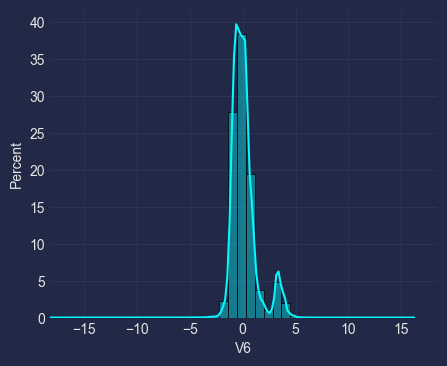

In [11]:
histplot_hyperparams = {
    'kde':True,
    'alpha':0.4,
    'stat':'percent',
    'bins':50
}


n_cols = 1
n_rows = 1
cell_with_dim = 5
cell_height_dim = 4

fig, ax = plt.subplots(n_rows, n_cols, figsize=(n_cols * cell_with_dim, n_rows * cell_height_dim))

sns.histplot(train_df[features[5]], label='Train X', color='#08F7FE', ax=ax, **histplot_hyperparams)
xlim = ax.get_xlim()
large_xlin_distance = abs(xlim[np.argmax(xlim)])
mean = train_df[features[0]].describe()['mean']
ax.set_xlim((mean-large_xlin_distance,mean+large_xlin_distance))


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [01:30<00:00,  3.12s/it]


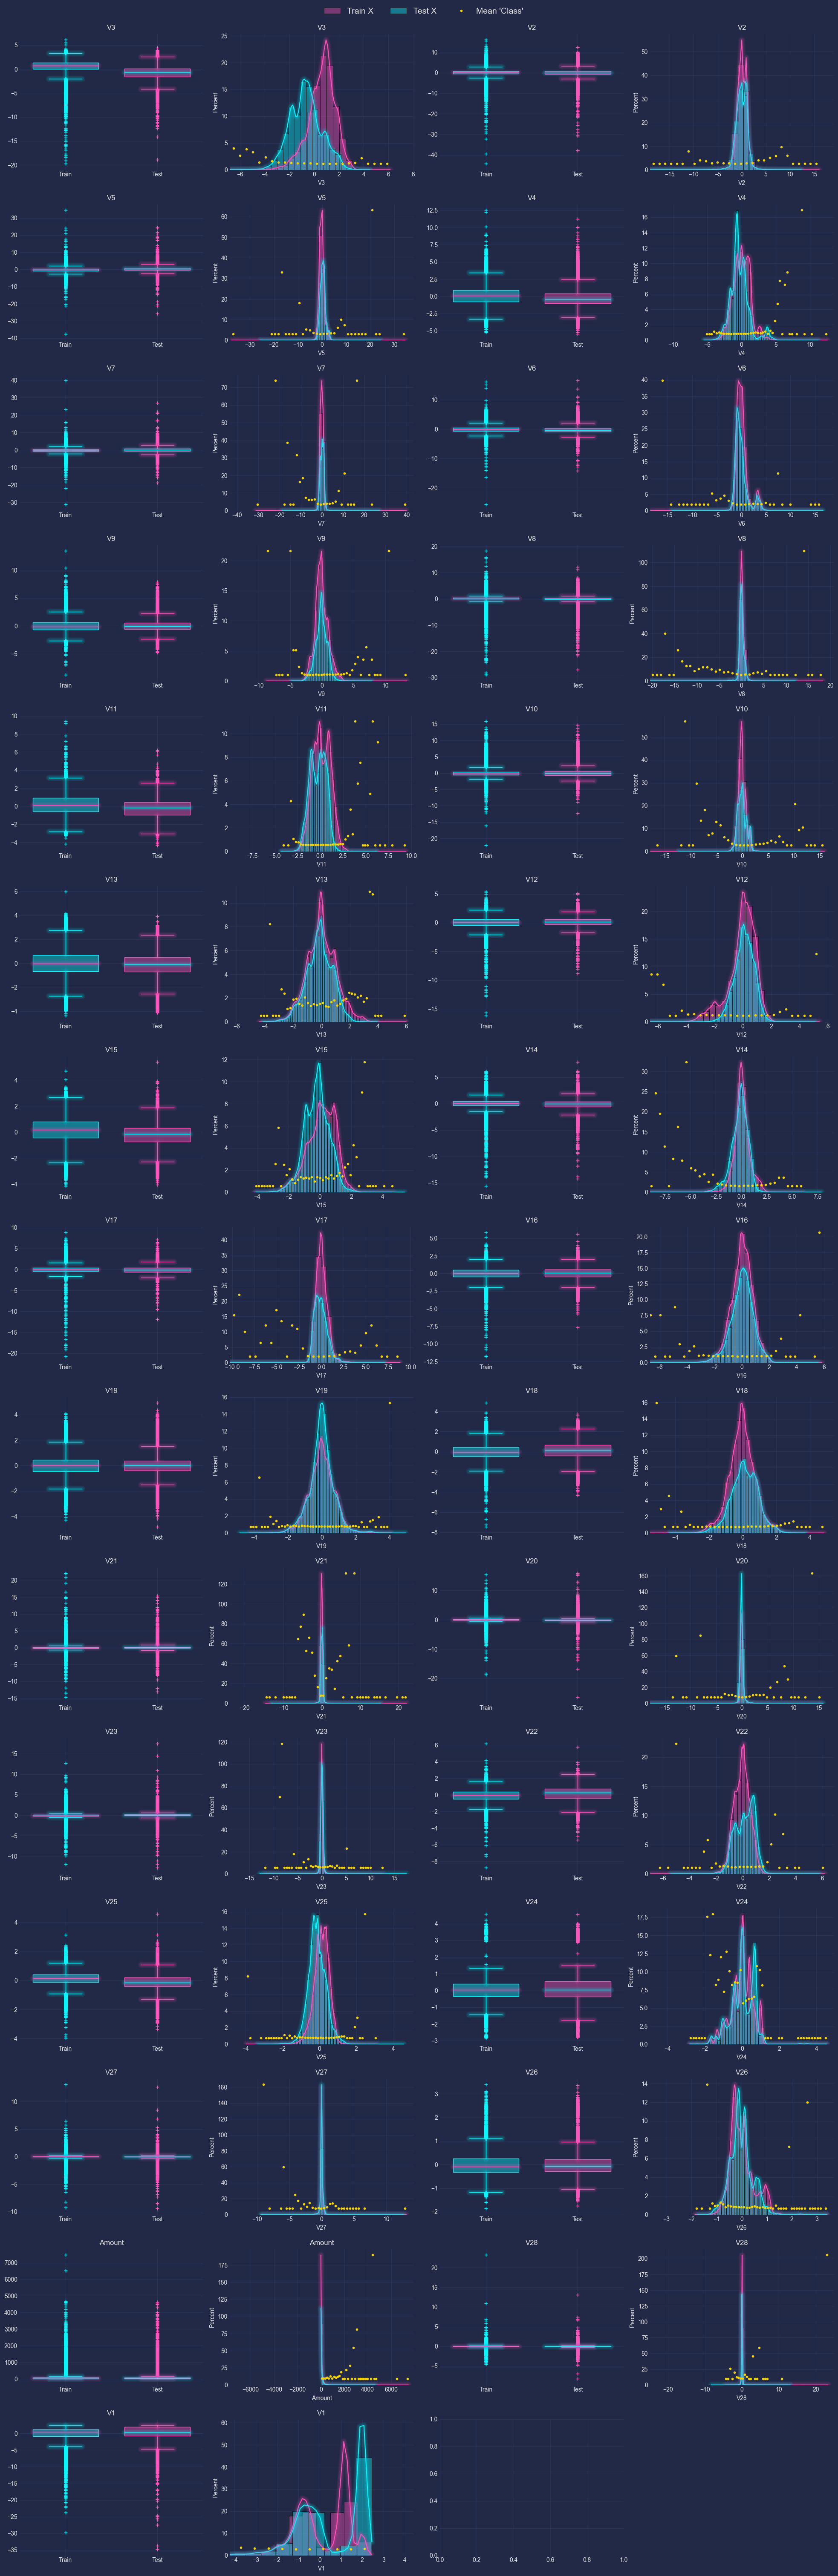

In [161]:
n_cols = 2
n_rows = math.ceil(len(features) / n_cols)
cell_with_dim = 5
cell_height_dim = 4
pad=2
h_pad=4
w_pad=None
n_bins=50

histplot_hyperparams = {
    'kde':True,
    'alpha':0.4,
    'stat':'percent',
    'bins':n_bins
}

def add_secondary_plot(df, column, target_column, ax, n_bins, color=3, show_yticks=False, marker="."):
    secondary_ax = ax.twinx()
    bins = pd.cut(df[column], bins=n_bins)
    bins = pd.IntervalIndex(bins)
    bins = (bins.left + bins.right) / 2
    target = df.groupby(bins)[target_column].mean()
    target.plot(
        ax=secondary_ax, linestyle='',
        marker=marker, color=color, label=f"Mean '{target_column}'"
    )
    secondary_ax.grid(visible=False)
    
    if not show_yticks:
        secondary_ax.get_yaxis().set_ticks([])
        
    return secondary_ax

fig, ax = plt.subplots(n_rows, n_cols*2, figsize=(n_cols*2 * cell_with_dim, n_rows * cell_height_dim))
plt.tight_layout(pad=pad, h_pad=h_pad, w_pad=w_pad, rect=None)

for a in ax[n_rows - 1, int(((n_rows - (len(features) / n_cols)) * n_cols*-1)):]:
    a.axis('off')
axs = []
for i in tqdm(range(len(features[0:5]))):
    row = math.ceil(i / n_cols) - 1
    col = (i % n_cols) 
    
    sources = [train_df, test_df]
    source_labels = ['Train', 'Test']
    color_sets = [['#08F7FE','#FE53BB'], ['#FE53BB','#08F7FE']]
    
    for s, source in enumerate(sources):
        c1 = color_sets[s][0]
        c2 = color_sets[s][1]
        bp = ax[row, col * 2].boxplot(x=source[features[i]], sym='k+', positions=[s], patch_artist=True, labels=[source_labels[s]], widths=cell_with_dim / (cell_with_dim + 2))

        ax[row, col * 2].set_title(features[i])
        for box in bp['boxes']:
            box.set(color=c1, linewidth=1)
            box.set(facecolor=c1)
            r, g, b, a = box.get_facecolor()
            box.set_facecolor((r, g, b, .4)) # alpha layer
        for whisker in bp['whiskers']:
            whisker.set(color=c1, linewidth=1)
        for cap in bp['caps']:
            cap.set(color=c1, linewidth=1)
        for median in bp['medians']:
            median.set(color=c2)
        for flier in bp['fliers']:
            flier.set(color=c1, linewidth=1)
            flier.set(markeredgecolor=c1)
            
            
        
    sns.histplot(train_df[features[i]], label='Train X', color=c1, ax=ax[row, (col * 2) + 1], **histplot_hyperparams)
    sns.histplot(test_df[features[i]], label='Test X', color=c2, ax=ax[row, (col * 2) + 1], **histplot_hyperparams)
    ax[row, (col * 2) + 1].set_title(features[i])
    xlim = ax[row, (col * 2) + 1].get_xlim()
    large_xlin_distance = abs(xlim[np.argmax(xlim)])
    mean = train_df[features[i]].describe()['mean']
    ax[row, (col * 2) + 1].set_xlim((mean-large_xlin_distance,mean+large_xlin_distance))
        
    mplcyberpunk.make_lines_glow(ax[row, col * 2])
    mplcyberpunk.make_lines_glow(ax[row, (col * 2) + 1])
            

    
    sub_ax = add_secondary_plot(train_df, features[i], target[0], ax[row, (col * 2) + 1], n_bins, color='#F5D300')

    axs.append(ax[row, (col * 2) + 1].get_legend_handles_labels())
    axs.append(sub_ax.get_legend_handles_labels())
    
        
leg_handles = []
leg_labels = []
    
for axis in axs:
    if axis[1][0] not in leg_labels:
        leg_labels.extend(axis[1])
        leg_handles.extend(axis[0])

fig.legend(leg_handles, leg_labels, loc='upper center', bbox_to_anchor=(0.5, n_rows * 0.0005 + 1), fontsize=14, ncol=len(features) + 2)

0:0
0:1
0:2
0:3
0:4
1:0
1:1
1:2
1:3
1:4
2:0
2:1
2:2
2:3
2:4
3:0
3:1
3:2
3:3
3:4
4:0


D:\source\repos\venv\Python310\lib\site-packages\seaborn\axisgrid.py:1690: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  f = plt.figure(figsize=(height, height))


4:1
4:2
4:3
4:4


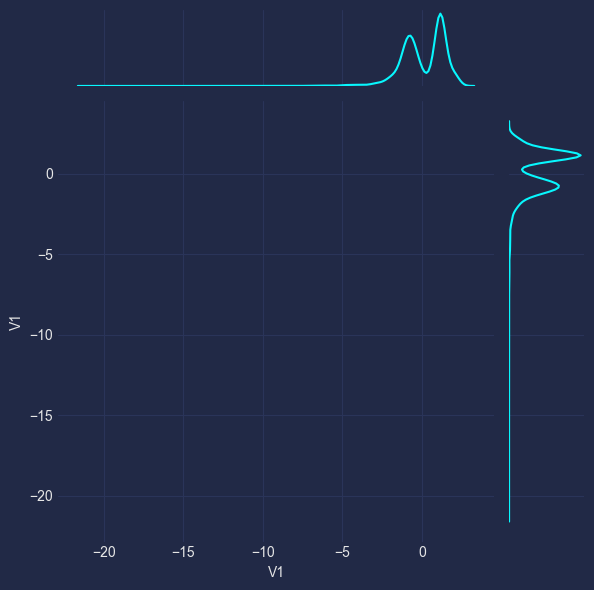

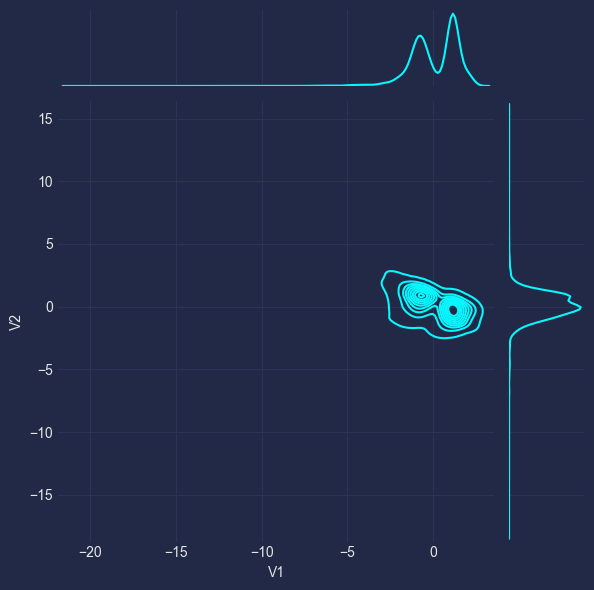

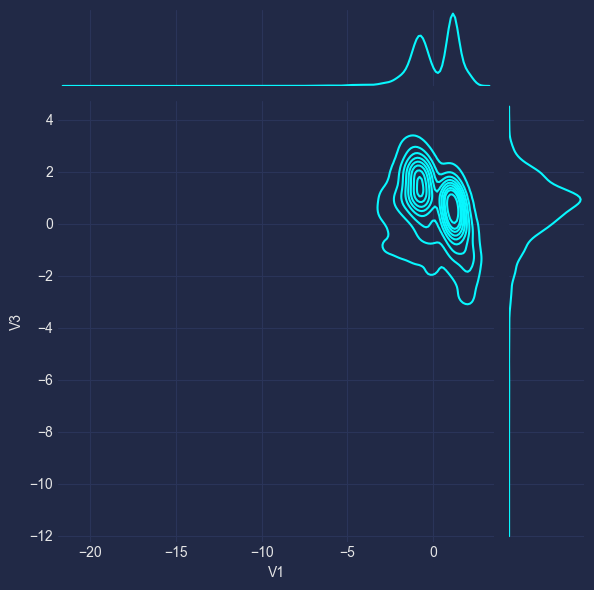

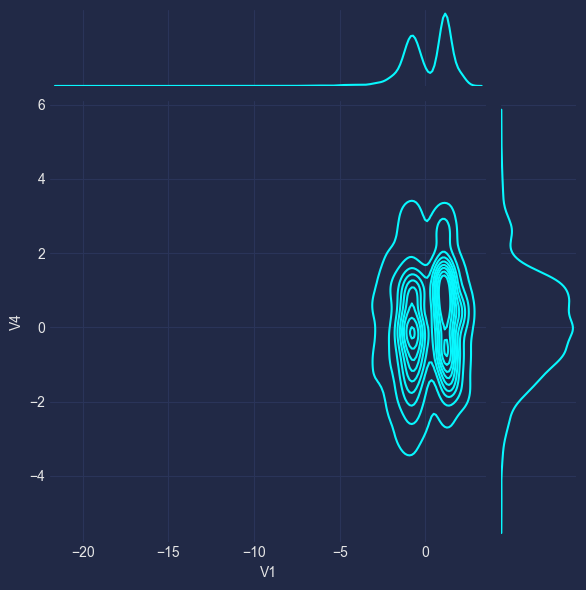

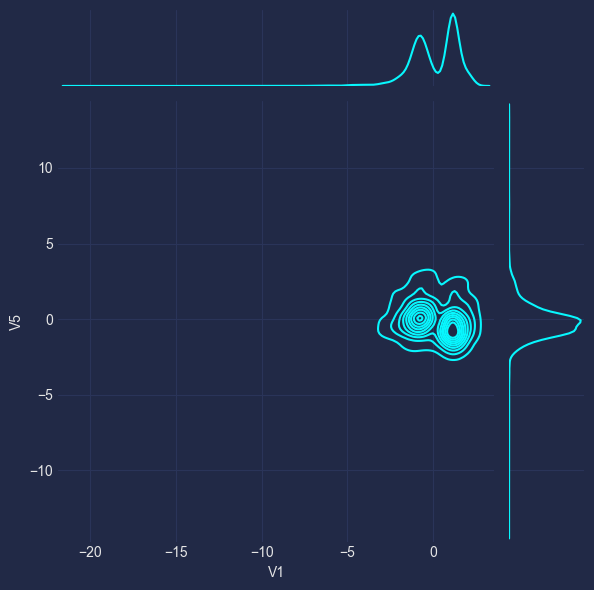

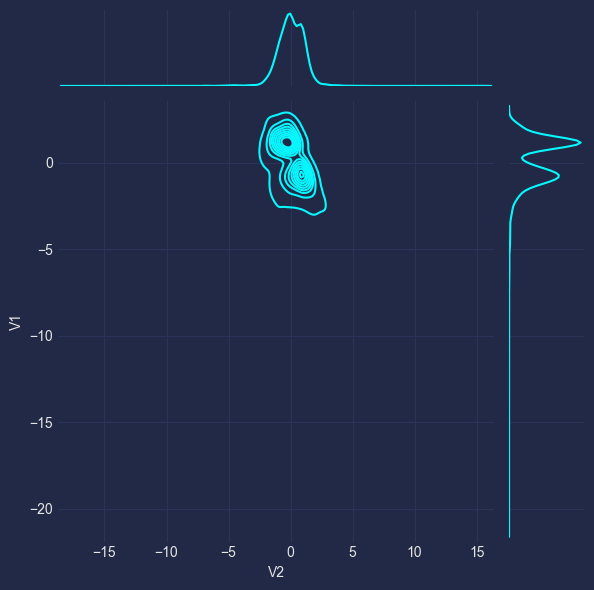

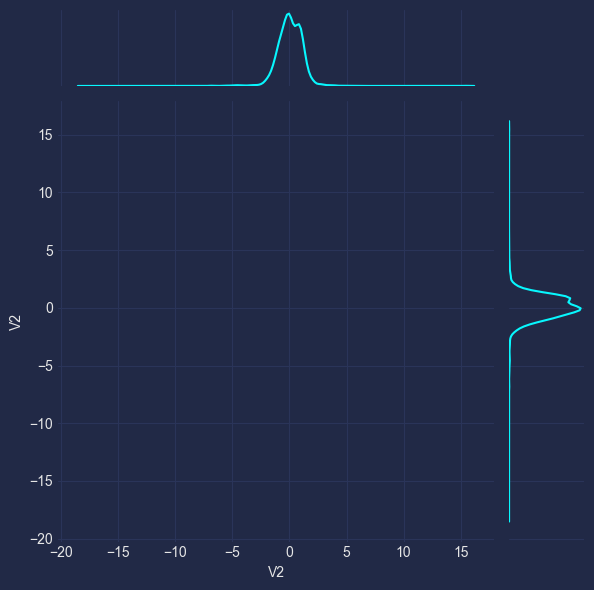

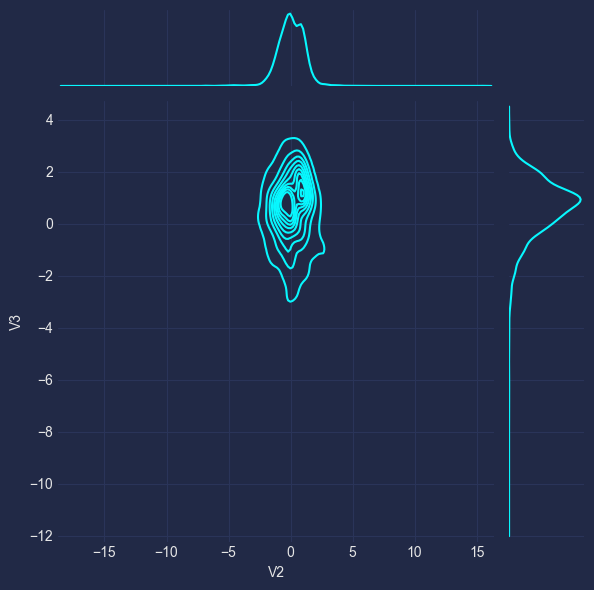

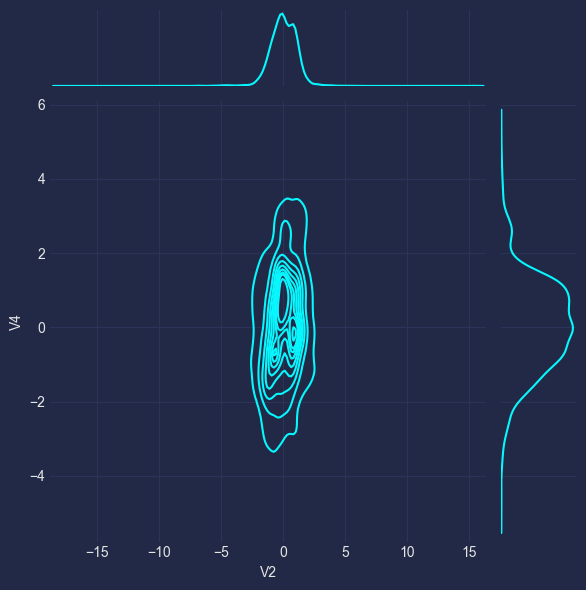

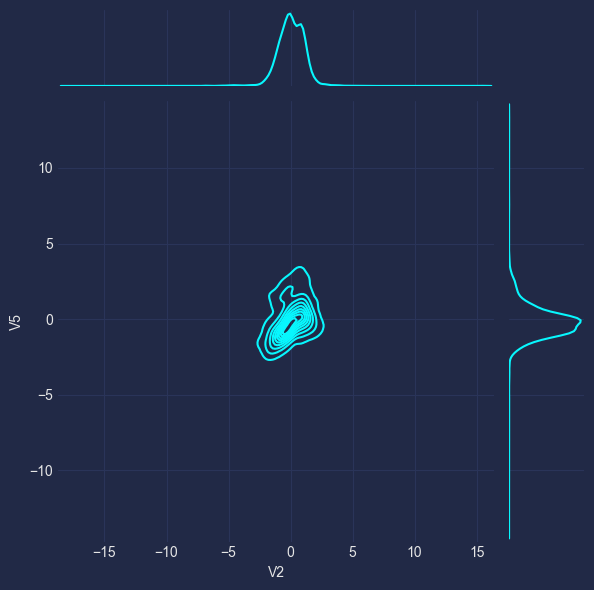

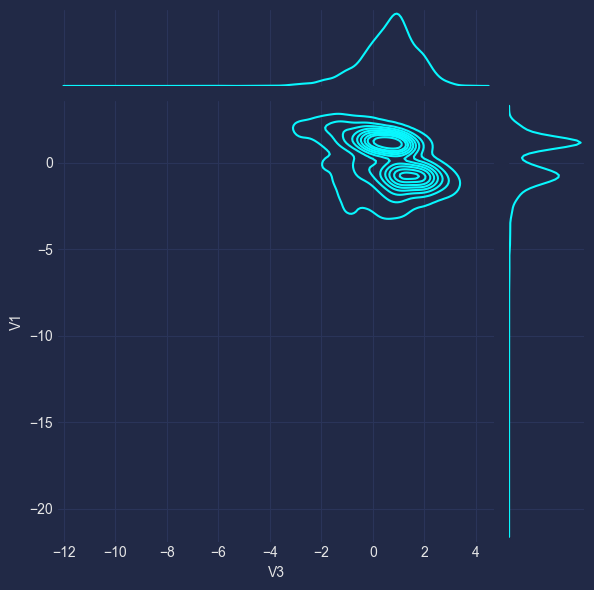

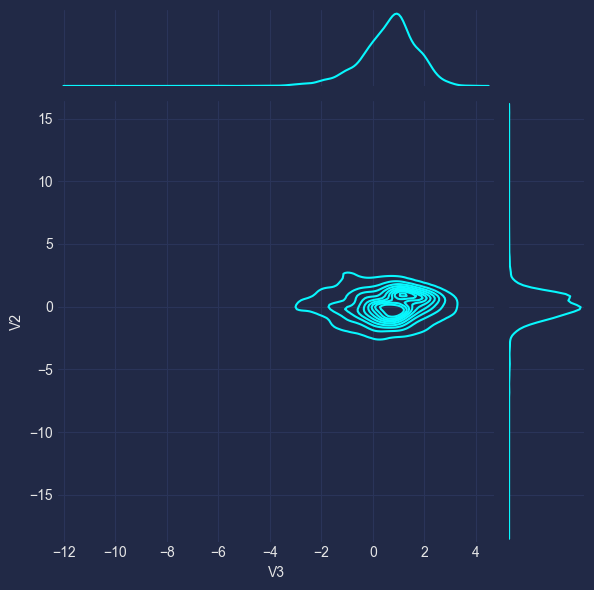

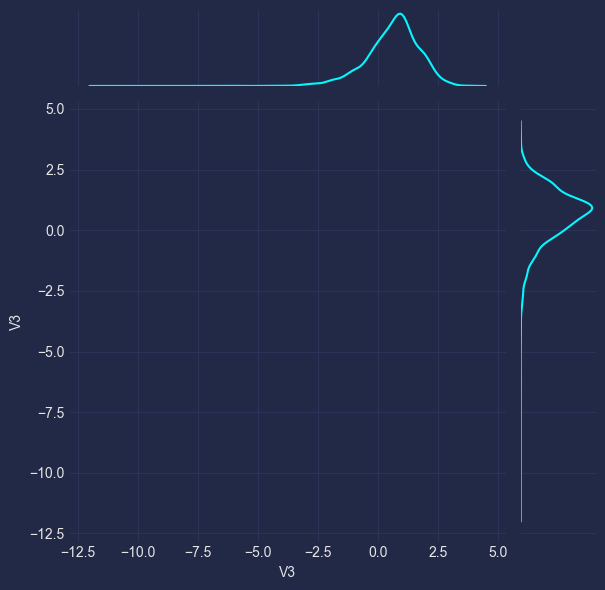

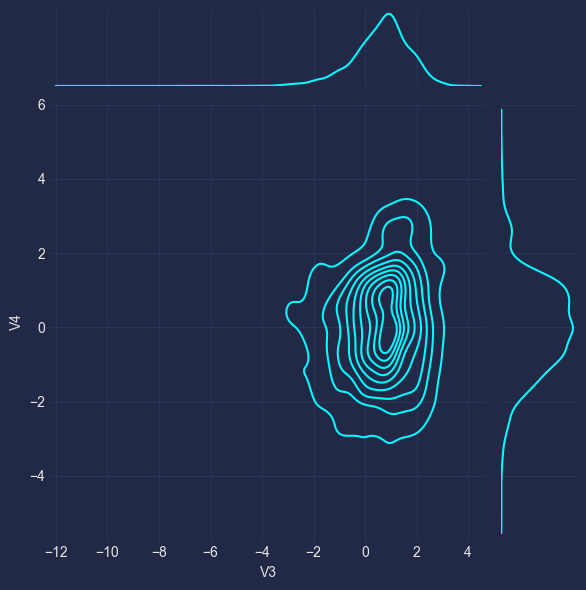

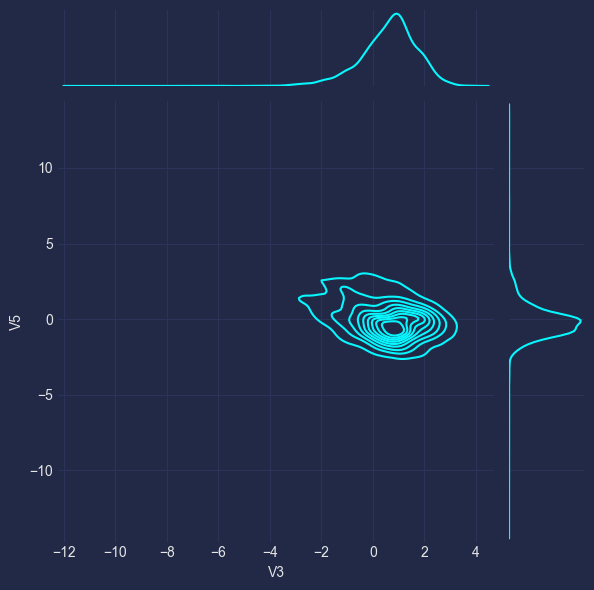

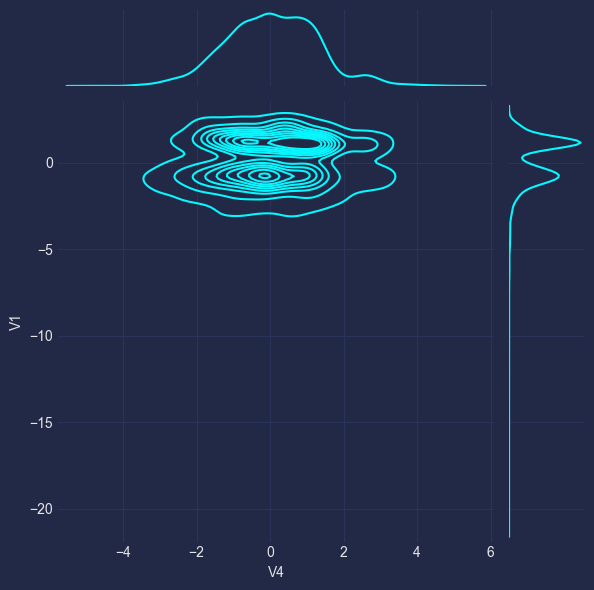

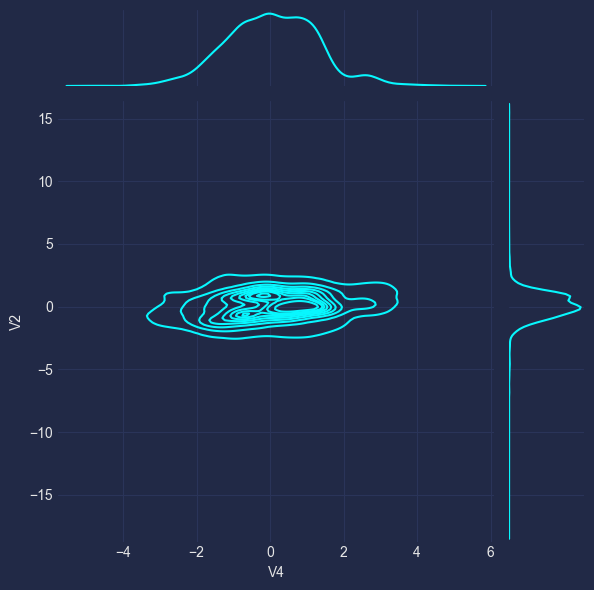

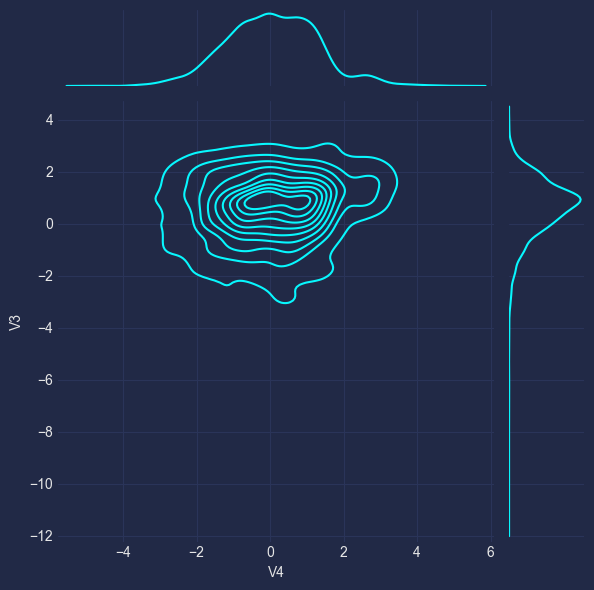

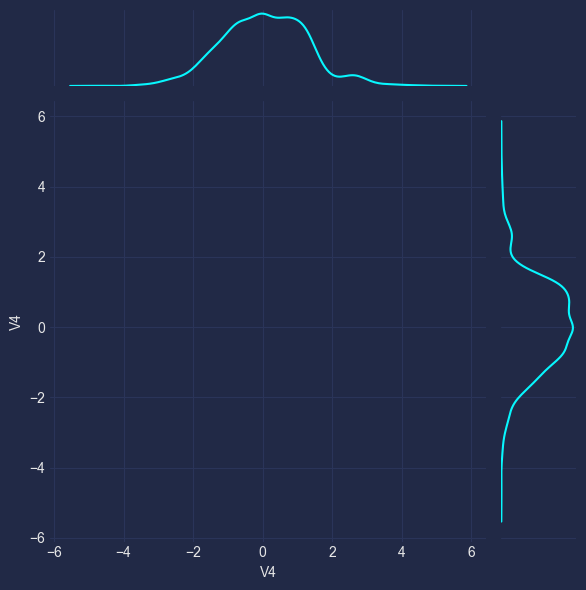

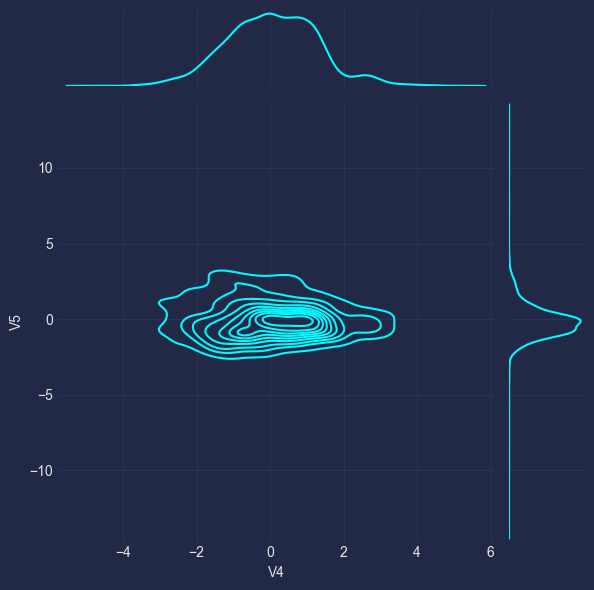

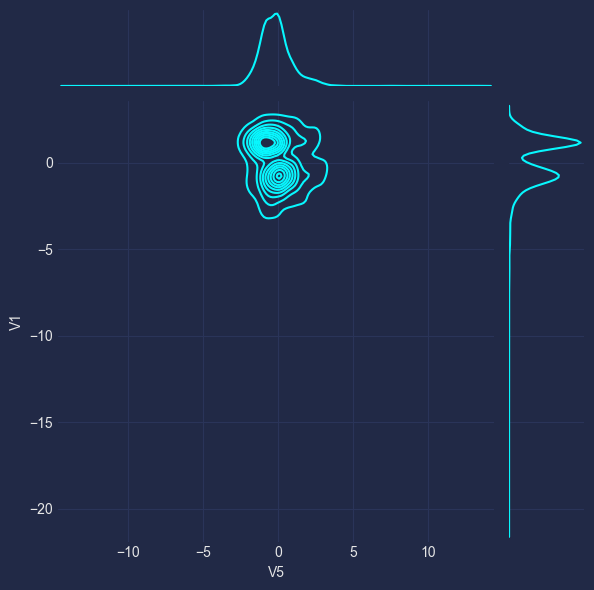

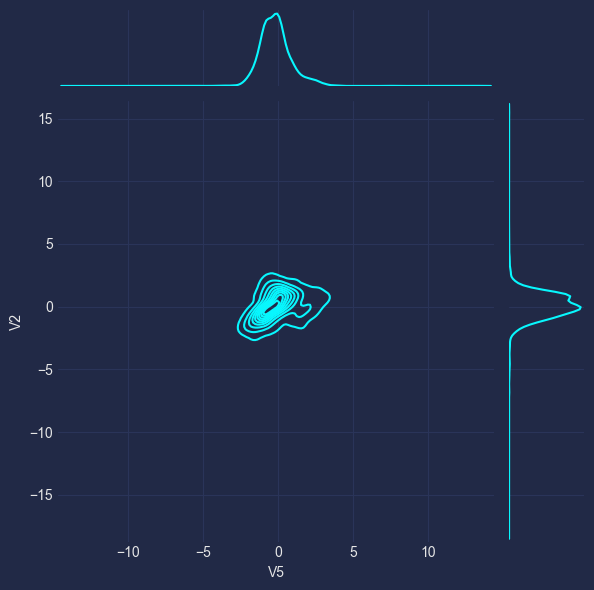

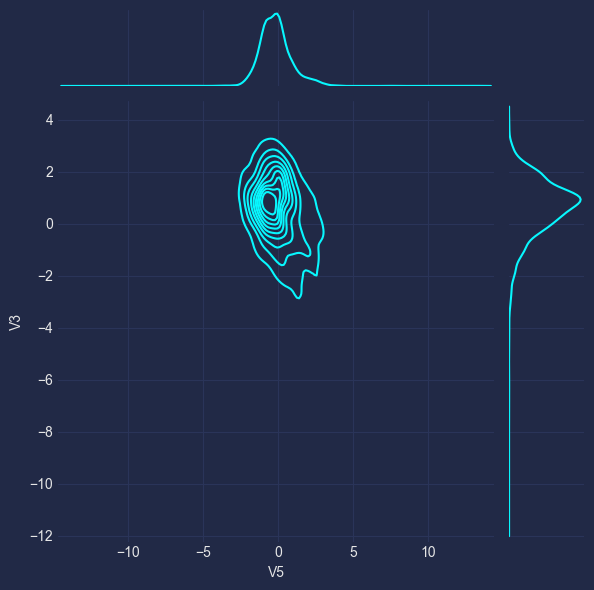

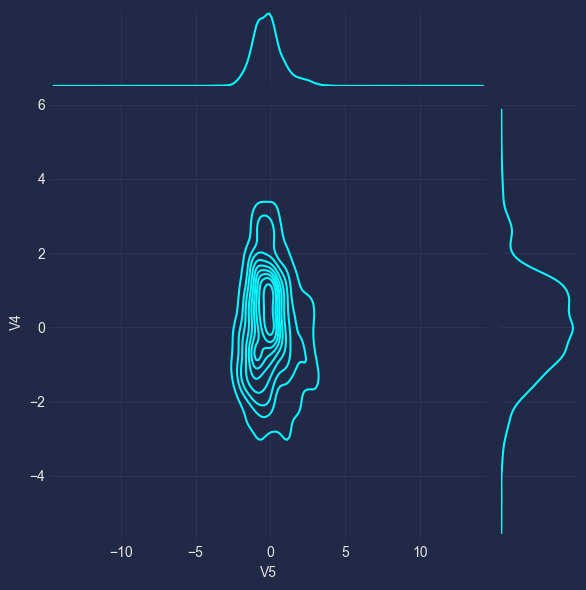

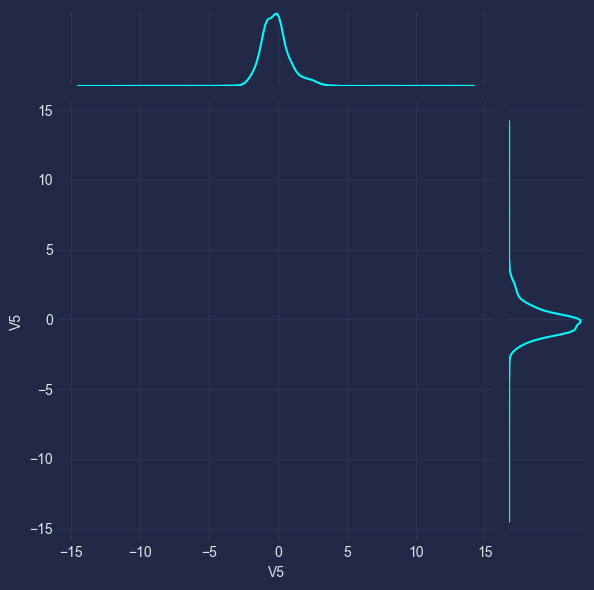

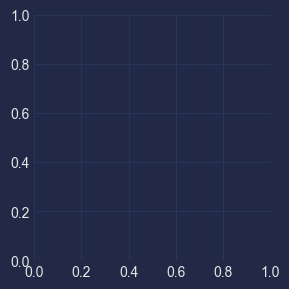

In [47]:
n_cols = len(features[0:5])
n_rows = len(features[0:5])
cell_with_dim = 4
cell_height_dim = 4
pad=2
h_pad=4
w_pad=None
n_bins=50

renders = []

for row_i, row_feature in enumerate(features[0:5]):
    for col_i, col_feature in enumerate(features[0:5]):
        print(f'{row_i}:{col_i}')
        renders.append(sns.jointplot(x=row_feature, y=col_feature, data=temp, kind="kde"))


sns.FacetGrid(renders)





In [59]:
renders[0].figure.show()

C:\Users\ryans\AppData\Local\Temp\ipykernel_18468\3645659094.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  renders[0].figure.show()


In [53]:
renders[0].ax_joint

<AxesSubplot: xlabel='V1', ylabel='V1'>

In [ ]:
def NonLinCdict(steps, hexcol_array):
    cdict = {'red': (), 'green': (), 'blue': ()}
    for s, hexcol in zip(steps, hexcol_array):
        rgb = hex2color(hexcol)
        cdict['red'] = cdict['red'] + ((s, rgb[0], rgb[0]),)
        cdict['green'] = cdict['green'] + ((s, rgb[1], rgb[1]),)
        cdict['blue'] = cdict['blue'] + ((s, rgb[2], rgb[2]),)
    return cdict

hc = ['#212946', '#FE53BB', '#F5D300']
th = [0, 0.5, 1]

cdict = NonLinCdict(th, hc)
cm = mc.LinearSegmentedColormap('test', cdict)


fig, ax = plt.subplots(1, figsize=(20,20))
res = sns.heatmap(train_df[features].corr(), annot=True, cmap=cm, ax = ax, fmt='.2f')
for _, spine in res.spines.items():
    spine.set_visible(True)
    spine.set_linewidth(1)
    spine.set_color('#08F7FE')
    
xticks = ax.get_xticks()
for i in range(len(xticks)-1):  
    ax.axvline( x=(xticks[i] + xticks[i+1]) / 2, ymin=ax.get_ylim()[0], ymax=ax.get_ylim()[1], linewidth=0.5, color='#08F7FE')
    
yticks = ax.get_yticks()
for i in range(len(yticks)-1):  
    ax.axhline( y=(yticks[i] + yticks[i+1]) / 2, xmin=ax.get_xlim()[0], xmax=ax.get_xlim()[1], linewidth=0.5, color='#08F7FE')
    
    
# plt.savefig("Heatmap.png")
mplcyberpunk.make_lines_glow(ax, diff_linewidth=0.9)
plt.show()

In [160]:
sns.pairplot(train_df[features].sample(frac=0.2))


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x000001AEFE037130> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x000001AEAE2DC9D0> (for post_execute):


KeyboardInterrupt: 